In Lecture 24 of MCS 320, we consider Taylor series to approximate functions.

# 1. Taylor Series

We can define Taylor series formally on any function ``f`` in ``x``.

In [1]:
f = function('f')(x) # function with name f in x

Let us develop about ``x = a``, for some symbol ``a``.

In [2]:
a = var('a') 

In [3]:
tf = taylor(f, x, a, 4)
tf

1/24*(a - x)^4*diff(f(a), a, a, a, a) - 1/6*(a - x)^3*diff(f(a), a, a, a) + 1/2*(a - x)^2*diff(f(a), a, a) - (a - x)*diff(f(a), a) + f(a)

In [4]:
type(tf)

<class 'sage.symbolic.expression.Expression'>

In [5]:
tcos = taylor(cos(x), x, 0, 4)
tcos

1/24*x^4 - 1/2*x^2 + 1

In [6]:
pcos = tcos.power_series(QQ)
pcos

1 - 1/2*x^2 + 1/24*x^4 + O(x^5)

In [7]:
type(pcos)

<class 'sage.rings.power_series_poly.PowerSeries_poly'>

Because ``pcos`` is a power series, we can ask for its multiplicative inverse.

In [8]:
icos = pcos.inverse()
icos

1 + 1/2*x^2 + 5/24*x^4 + O(x^5)

In [9]:
pcos*icos

1 + O(x^5)

In [10]:
icos*pcos

1 + O(x^5)

# 2. Taylor Series in Several Variables

As an application, consider the computation of the tangent line at any point at the unit circle.

In [11]:
x, y = var('x, y')

In [12]:
circle = x^2 + y^2 - 1

The coordinates of the point can be left as variables ``a`` and ``b``.

In [13]:
a, b = var('a, b')

In [14]:
ts = taylor(circle, (x, a), (y, b), 1)
ts

-2*(a - x)*a + a^2 - 2*(b - y)*b + b^2 - 1

Let us make a plot to geometrically verify the formula.

In [15]:
angle = RR(pi)*RR.random_element()
(A, B) = (cos(angle), sin(angle))
(A, B)

(0.588438359127057, 0.808542081470010)

In [16]:
tline = ts(a = A, b = B)
tline

1.17687671825411*x + 1.61708416294002*y - 2.00000000000000

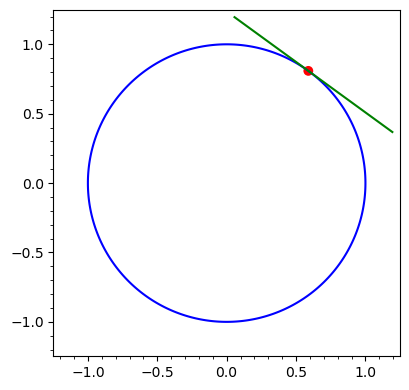

In [17]:
pc = implicit_plot(circle, (x, -1.2, 1.2), (y, -1.2, 1.2), aspect_ratio=1)
pp = point((A, B), size=50, color='red')
pL = implicit_plot(tline, (x, -1.2, 1.2), (y, -1.2, 1.2), color='green')
show(pc+pp+pL)

# 3. Approximations

Consider a truncated Taylor series to approximate ``sin(x)``.

In [18]:
tsin = taylor(sin(x), x, 0, 9)
tsin

1/362880*x^9 - 1/5040*x^7 + 1/120*x^5 - 1/6*x^3 + x

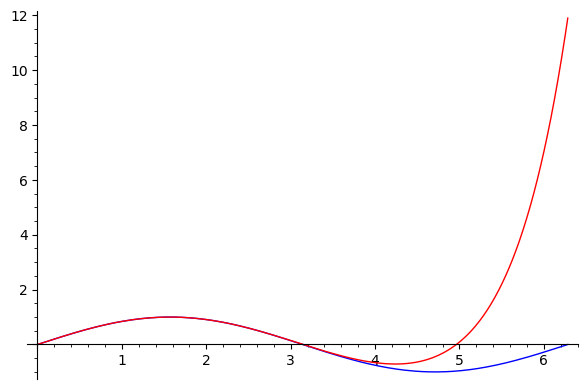

In [19]:
plotsin = plot(sin(x), (x, 0, 2*pi))
plotser = plot(tsin(x=x), (x, 0, 2*pi), color='red')
show(plotsin+plotser)

The Taylor series is sufficiently good locally, but not over the entire interval.

A rational approximation give getter results.

In [20]:
P.<z> = PowerSeriesRing(QQ)
P

Power Series Ring in z over Rational Field

In [21]:
pd = sin(z).pade(5,5)
pd

(551/75*z^5 - 1484/5*z^3 + 11088/5*z)/(z^4 + 364/5*z^2 + 11088/5)

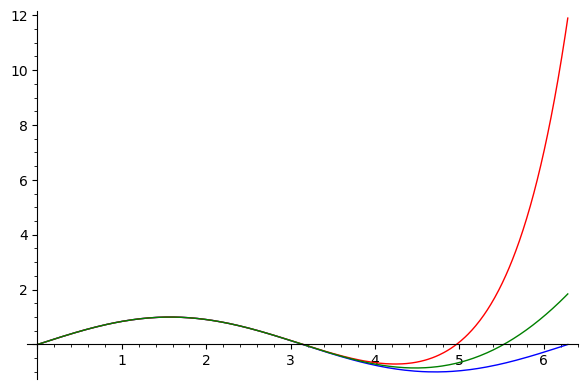

In [22]:
plotpade = plot(pd(z=x), (x, 0, 2*pi), color='green')
show(plotsin+plotser+plotpade)

The rational approximation agrees with the series locally, but gives better global results.

# 4. Series in SymPy

The ``series`` in SymPy can be computed with a generator.

In [23]:
import sympy as sp

In [24]:
sersin = sp.series(sin(x), x0=0, n=None)
sersin

<generator object Expr.series.<locals>.<genexpr> at 0x7f4ea523b450>

In [25]:
next(sersin)

x

In [26]:
next(sersin)

-x**3/6

In [27]:
next(sersin)

x**5/120

Applying ``next()`` to the generator we get the next term in the series.